In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [2]:
import tensorflow as tf
import os


In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_18204\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = "data"

In [5]:
os.listdir(os.path.join(data_dir,"happy"))

['-2262.jpg',
 '05-12-21-happy-people-1024x644.jpg',
 '05-12-21-happy-people.jpg',
 '0fcffabc5c9f00e5d68e7dc906e3aae2.jpg',
 '10-Proven-Habits-of-the-Happiest-People-In-The-World.jpeg',
 '1902539.jpg',
 '1902544.jpg',
 '1902558.jpg',
 '1902566.jpg',
 '1902587.jpg',
 '37892bf4c595918e70cec96da18022f0.jpg',
 '5Hoq5twItmrrW76KaBPuyhV9Kt0.jpg',
 '738444938e285996953e05bb742327da.jpg',
 '859152.jpg',
 '90f47ecc7127710c3c97efc28ff476d3--smiley-faces-happy-people.jpg',
 'ace-of-happy-smiling-middle-aged-woman-at-office_rleqp4y7g_thumbnail-1080_09.png',
 'AdobeStock_267519882.jpeg',
 'AdobeStock_52265695-1.jpeg',
 'attractive-woman-free-stock-photo-1.jpg',
 'beautiful-girl-face-free-stock-photo-1.jpg',
 'bhUEIdQFwbS_E8PotYL_6_ogXWQ.jpg',
 'bigstock-Happy-Business-People-Working-255899575.jpg',
 'bigstock-Happy-Group-Of-People-3928383-2-1-scaled.jpg',
 'bigstock-Portrait-of-a-very-happy-young-126488393.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'bigstock_Happy_Bu

In [6]:
image_exts = ["jpeg","jpg","bmp","png"]

In [7]:
img = cv2.imread(os.path.join(data_dir,'sad','OIP.abyG0-w10RjLXVwcIUAkXAHaLH.jpg'))

In [8]:
img.shape

(236, 157, 3)

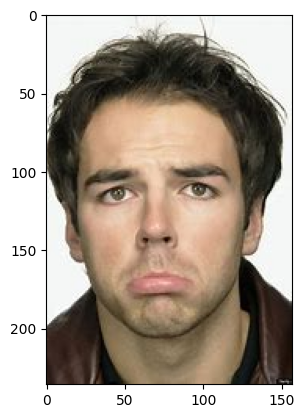

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

Load Data

In [11]:
import numpy as np

In [17]:
data = tf.keras.utils.image_dataset_from_directory("data",batch_size=16)

Found 773 files belonging to 2 classes.


In [18]:
type(data)

tensorflow.python.data.ops.batch_op._BatchDataset

In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

In [26]:
batch[1]

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

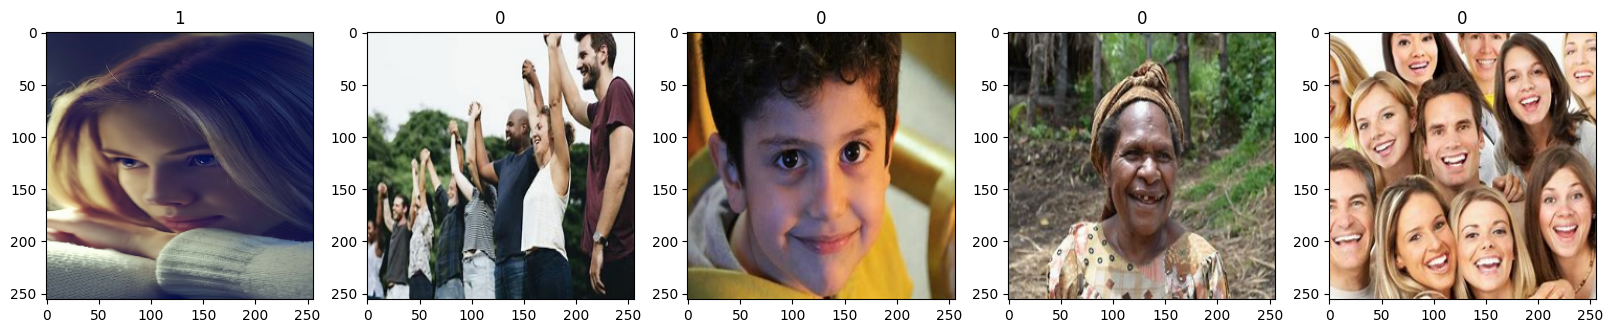

In [31]:
fig,ax = plt.subplots(ncols=5,figsize=  (20,20))
for i,img in enumerate(batch[0][:5]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

In [32]:
#Found that class 0 = Happy Image 
#Found that class 1 = Sad Image

Build the DL Model